<a href="https://colab.research.google.com/github/ananay-sethi/Session-22/blob/main/autoencode_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autoencoder Tutorial

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import glob
import pylab as pl
from PIL import Image

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. change kernel to GPU
go to runtime -> change runtime type -> GPU

# digits first

(10000, 28, 28)

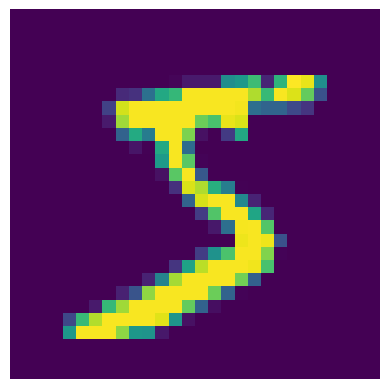

In [3]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_test.shape

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [5]:
x_train.dtype, x_train.max(), x_train.min()

(dtype('uint8'), 255, 0)

In [6]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# create a model

In [7]:
keras.models?

In [8]:
model_digits64 = Sequential()
## encoder
# input layer and the output size
model_digits64.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model_digits64.add(Dense(64, activation='relu'))
model_digits64.add(Dense(32, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(64, activation='relu'))
model_digits64.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))


#alternative syntax
"""
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
"""

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\nencoded = Dense(encoding_dim, activation=\'relu\')(input_img)\n# "decoded" is the lossy reconstruction of the input\ndecoded = Dense(784, activation=\'sigmoid\')(encoded)\n\nautoencoder = Model(input_img, decoded)\n\nencoder = Model(input_img, encoded)\n\n# create a placeholder for an encoded (32-dimensional) input\nencoded_input = Input(shape=(encoding_dim,))\n# retrieve the last layer of the autoencoder model\ndecoder_layer = autoencoder.layers[-1]\n# create the decoder model\ndecoder = Model(encoded_input, decoder_layer(encoded_input))\n'

### regression
- loss='mean_squared_error' L2: default loss to use for regression problems. => linear activation function in output layer, one node out

alternatives:  loss='mean_squared_logarithmic_error', 'mean_absolute_error' (which is L1 instead of L2)
### binary classification

- loss='binary_crossentropy' => sigmoid activation function in output layer, one node out

alternatives: 'hinge'

### multiclass classification
categorical encoded as numerical
- loss='categorical_crossentropy' => softmax n nodes out

onehot encoded categoridal
- 'parse_categorical_crossentropy' => softmax n nodes out

- 'kullback Leibler Divergence Loss' => probabilistic categorical classification; log(P/Q)

## optimizers
- SGD: stocastic gradient descent
    - nesterov=True -> momentum inclusion
- adam: Adaptive moment estimation. **good in most cases**
- adagrad: different steps for different parameters based on frequency (binary input) well-suited for dealing with sparse data.

- adaDelta: like adagrad but compensated for vanishing learning rate problem

momentum refers to looking one step back and make a decision that includes the slope there

### parameter:
generally you need to adjust the learning rate which is how much you change the parameters by at each step.
keras.optimizers.Adam(lr=0.001)


https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif

In [40]:
# choose the optimizer and loss appropriately!
# model_digits64.compile(optimizer="adadelta", loss="mean_squared_error")
model_digits64.compile(optimizer = keras.optimizers.Adadelta(learning_rate=0.01), loss="binary_crossentropy")

In [41]:
print(model_digits64.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
history64 = model_digits64.fit(x_train, x_train,
                               validation_data=(x_test, x_test),
                               epochs=200, batch_size=100, verbose=1)

Epoch 1/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2145 - val_loss: 0.2092
Epoch 2/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2107 - val_loss: 0.2079
Epoch 3/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2097 - val_loss: 0.2071
Epoch 4/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2091 - val_loss: 0.2062
Epoch 5/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2078 - val_loss: 0.2055
Epoch 6/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2072 - val_loss: 0.2048
Epoch 7/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2065 - val_loss: 0.2042
Epoch 8/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2058 - val_loss: 0.2035
Epoch 9/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2053 - val_loss: 0.2029
Epoch 10/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2048 - val_loss: 0.2024
Epoch 11/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2047 - val_loss: 0.2019
Epoch 12/200
600/600 ━━━━━━━━━━━━━━━━━━━━

# always look at the loss!

Text(0.5, 0, 'iteration')

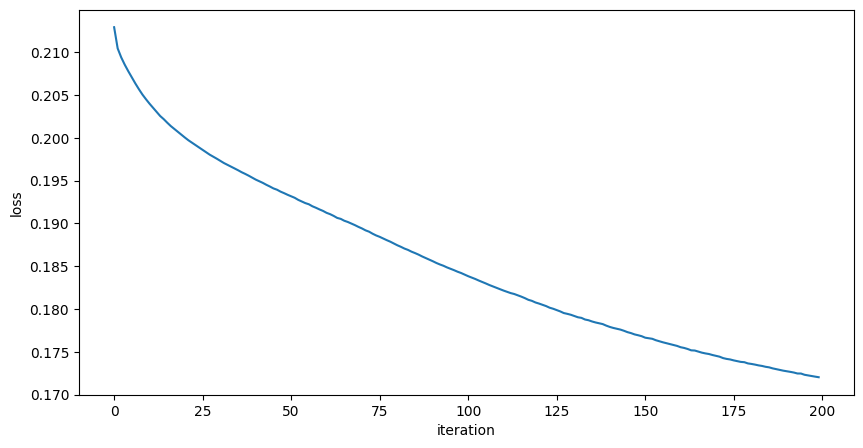

In [43]:
pl.plot(np.array(history64.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

The loss fuctionis plotted and because it is still decreasingn quite rapidly (slope of the curve not near 0 yet) I know I did not run enough epochs. Try and run for 200 epochs!

# predict

In [44]:
output_image64 = model_digits64.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [45]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121)
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122)
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

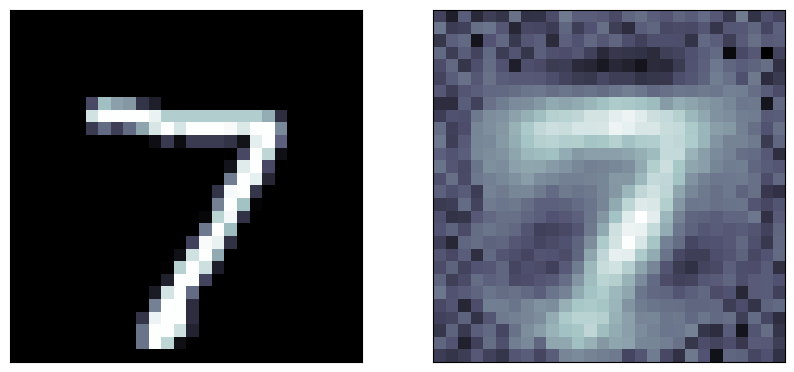

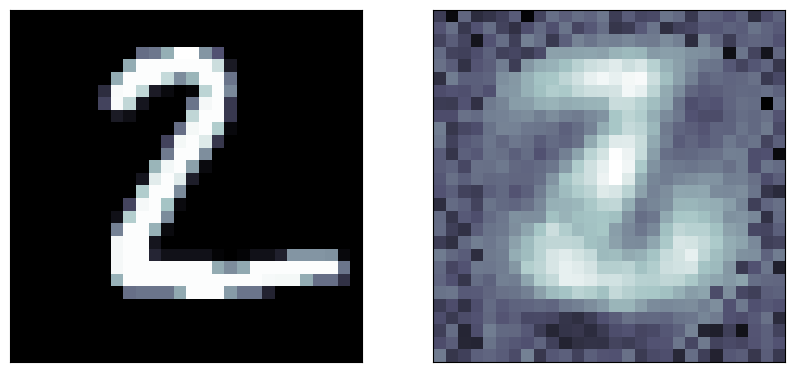

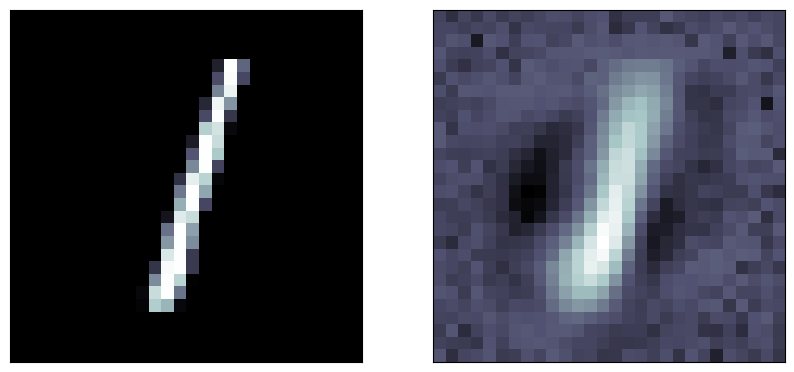

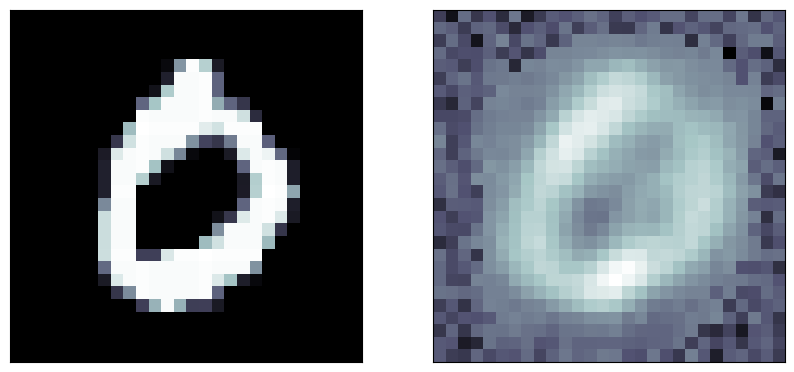

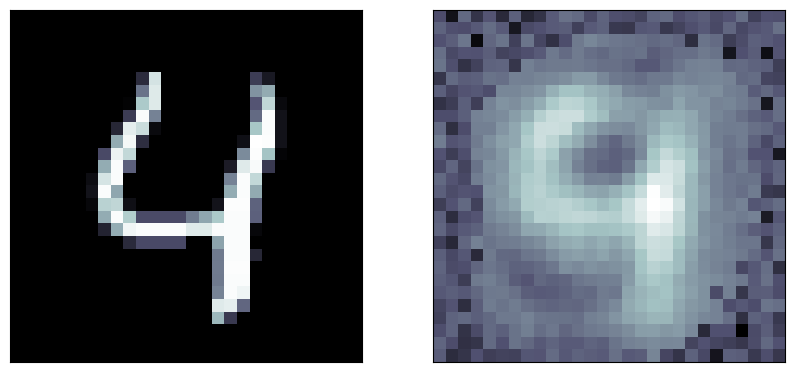

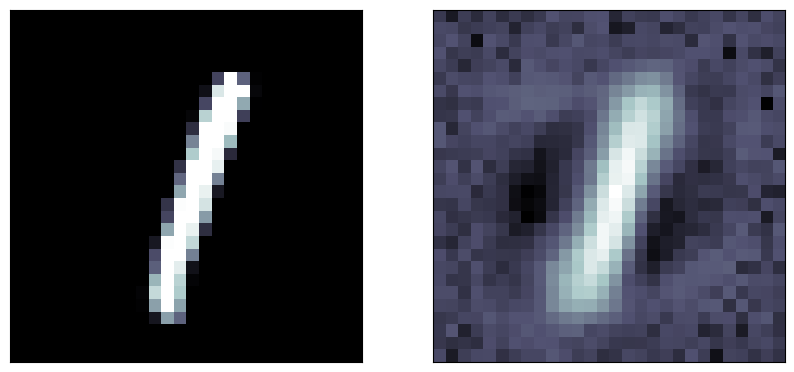

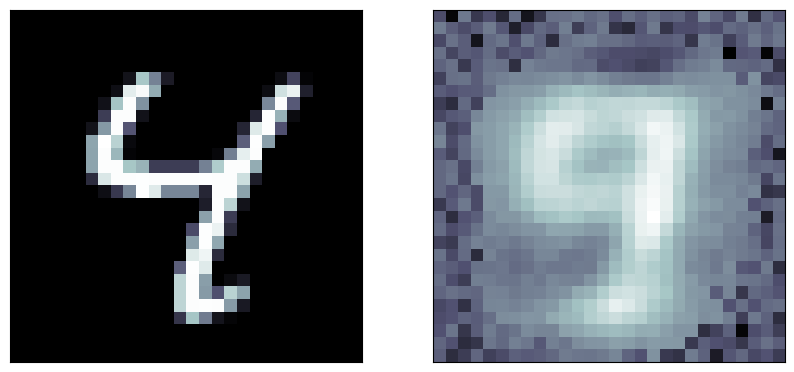

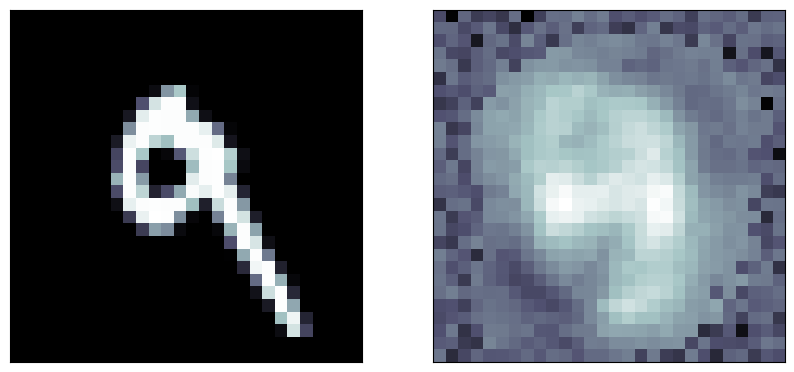

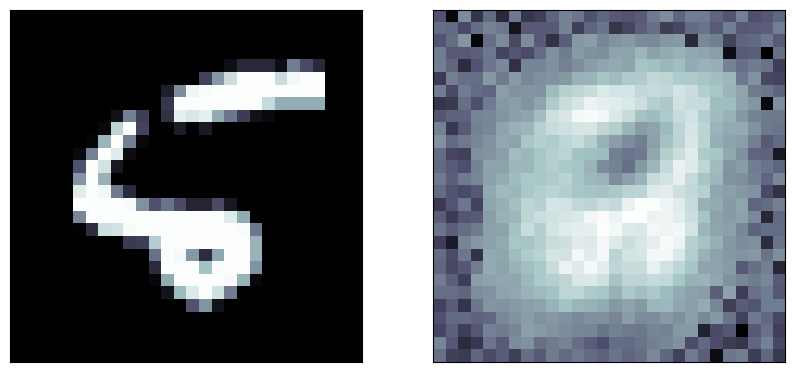

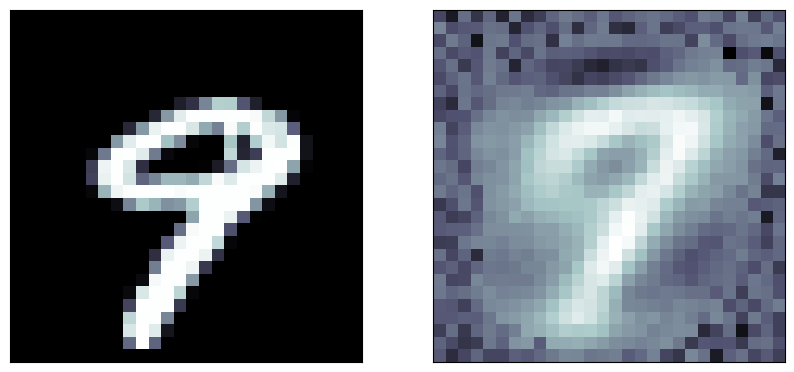

In [46]:
for i in range(10):
  compareinout(i, output_image64, x_test)

This is a rather bad result. Let me see if I can improve it . The images are too detailed. I can treat the problem as a binary problem to derice some detail. To approach a binary classifier I switch the activation function in the last layer to sigmoid

# change loss function

In [47]:
# choose the optimizer and loss appropriately!
model_digits64_sig = Sequential()
## encoder
# input layer and the output size
model_digits64_sig.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model_digits64_sig.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64_sig.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64_sig.add(Dense(ndim, activation='sigmoid'))
# model_digits64_sig.compile(optimizer="adadelta", loss="mean_squared_error") #binary_cross_entropy)
model_digits64_sig.compile(optimizer = keras.optimizers.Adadelta(learning_rate=0.01), loss="binary_crossentropy")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
history64_sig = model_digits64_sig.fit(x_train, x_train,
                                       validation_data=(x_test, x_test),
                                       epochs=250, batch_size=100, verbose=1)

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6920 - val_loss: 0.6887
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6874 - val_loss: 0.6823
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6797 - val_loss: 0.6675
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6596 - val_loss: 0.6163
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5847 - val_loss: 0.4429
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3984 - val_loss: 0.3100
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3024 - val_loss: 0.2867
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2855 - val_loss: 0.2802
Epoch 9/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2801 - val_loss: 0.2772
Epoch 10/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2774 - val_loss: 0.2753
Epoch 11/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2755 - val_loss: 0.2740
Epoch 12/250
600/600 ━━━━━━━━━━━━━━━━━━━━

Text(0.5, 0, 'iteration')

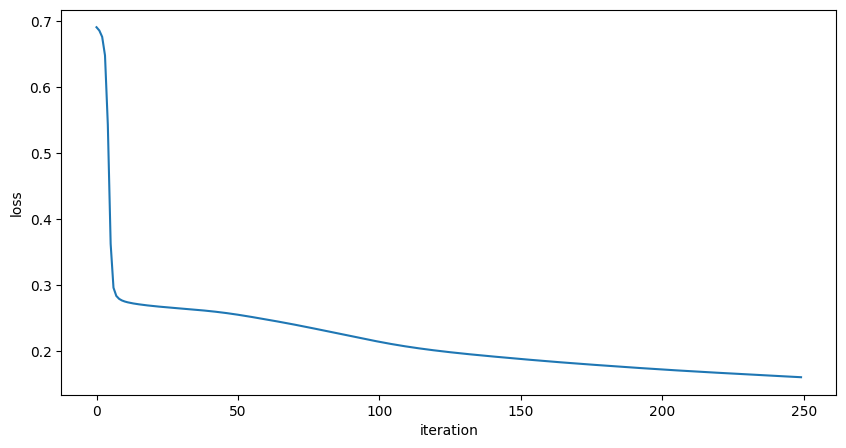

In [49]:
pl.plot(np.array(history64_sig.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

In [50]:
from keras.models import Model

model_LSR = Model(inputs=model_digits64_sig.layers[0].input, outputs=model_digits64_sig.layers[1].output)

model_LSR

<Functional name=functional_24, built=True>

In [51]:
model_digits64_sig.layers[1].output

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, name=keras_tensor_73>

The loss fuctionis plotted and because it is still decreasingn quite rapidly (slope of the curve not near 0 yet) I know I did not run enough epochs. Try and run for 200 epochs!

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


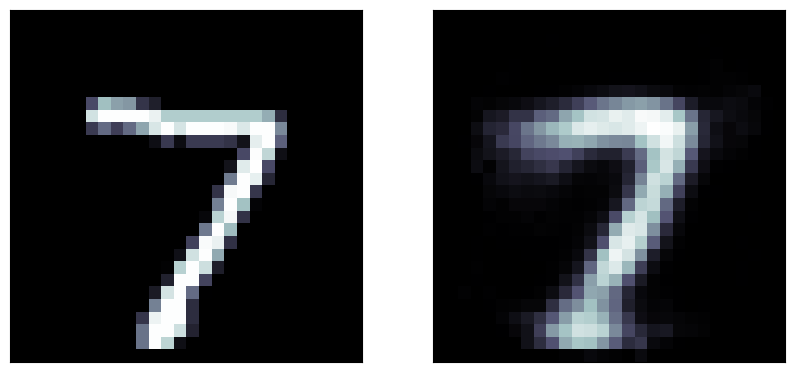

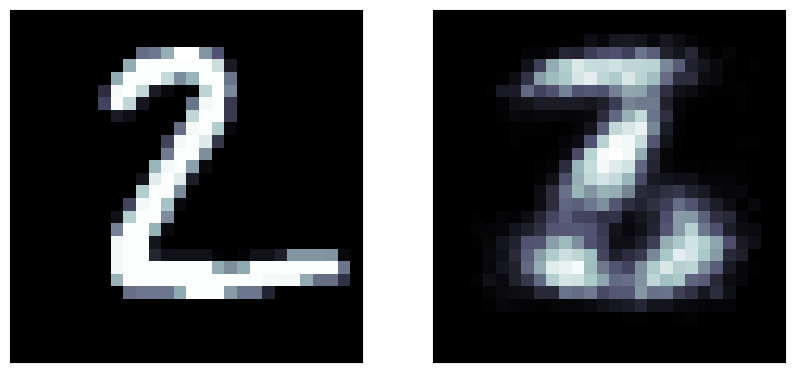

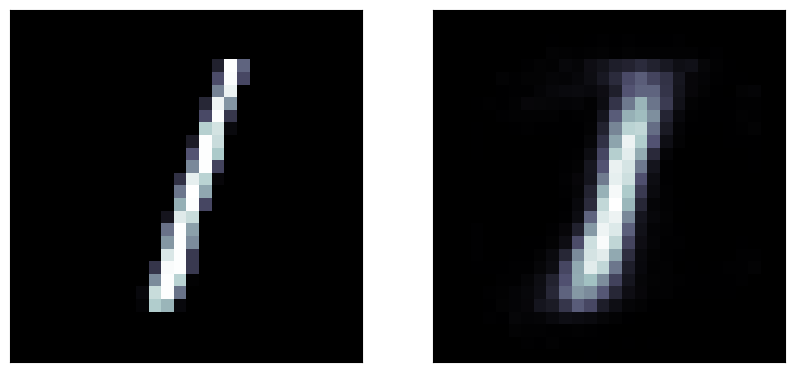

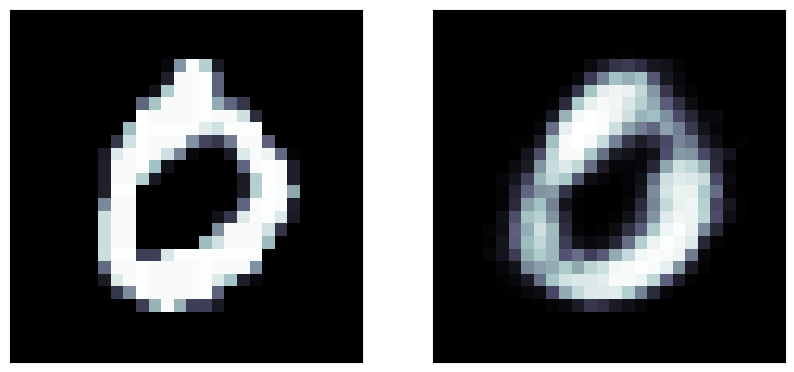

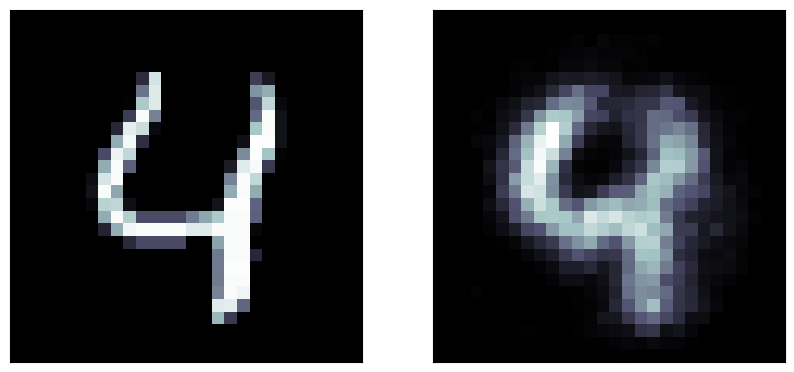

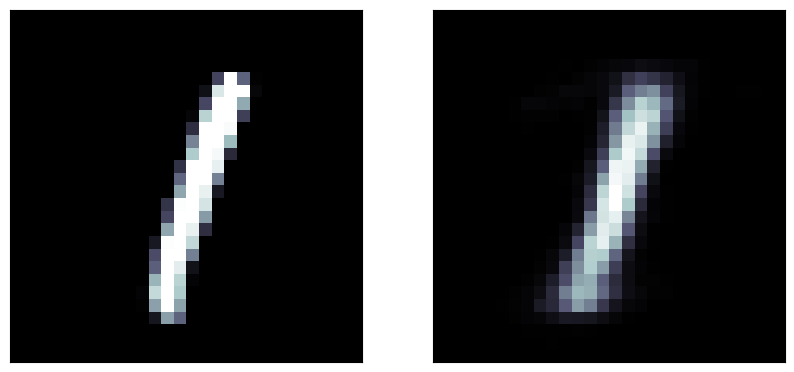

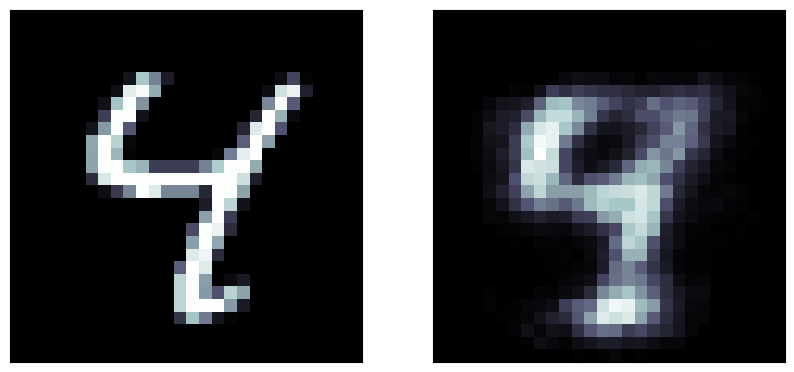

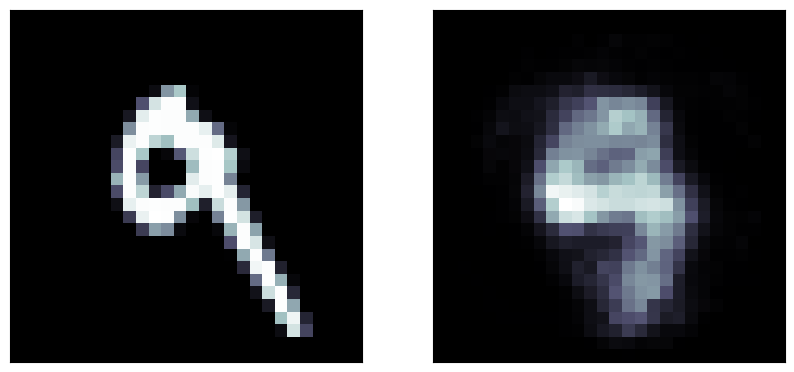

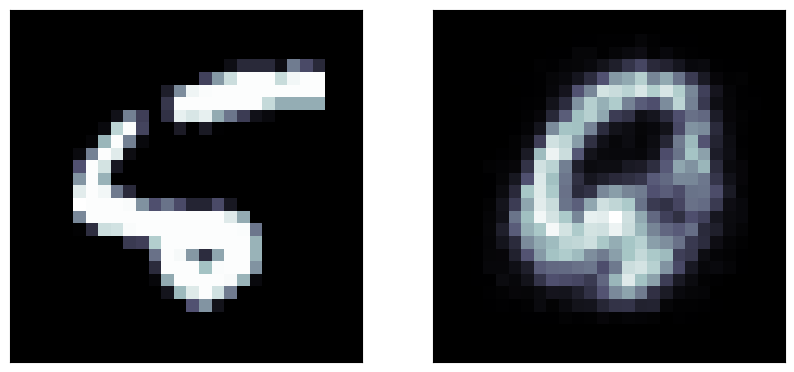

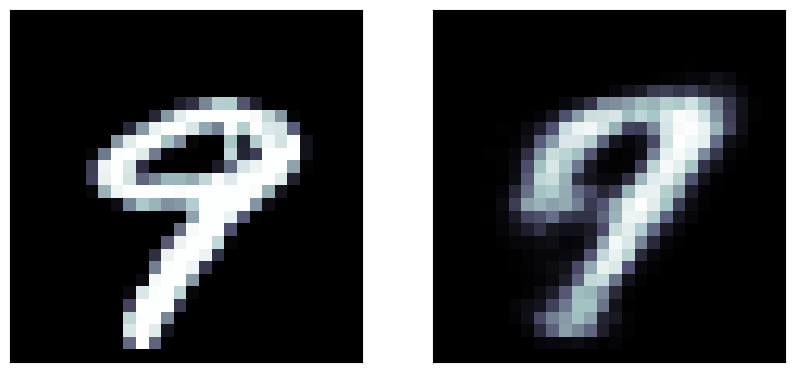

In [52]:
output_image64_sig = model_digits64_sig.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_sig, x_test)

Much better! Let me choose a loss function that is more appropriate for a nbinary classificaton.

In [53]:
# sigmoid and binary cross entropy loss
model_digits64_bce = model_digits64_sig

In [54]:
# model_digits64_bce.compile(optimizer="adadelta", loss="binary_crossentropy")
model_digits64_bce.compile(optimizer = keras.optimizers.Adadelta(learning_rate=0.01), loss="binary_crossentropy")
history64_bce = model_digits64_bce.fit(x_train, x_train,
                                       validation_data=(x_test, x_test),
                                       epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1605 - val_loss: 0.1587
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1603 - val_loss: 0.1585
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1601 - val_loss: 0.1583
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1601 - val_loss: 0.1580
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1597 - val_loss: 0.1578
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1594 - val_loss: 0.1576
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1593 - val_loss: 0.1574
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1588 - val_loss: 0.1572
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1587 - val_loss: 0.1570
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1584 - val_loss: 0.1567
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1581 - val_loss: 0.1565
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Text(0.5, 0, 'iteration')

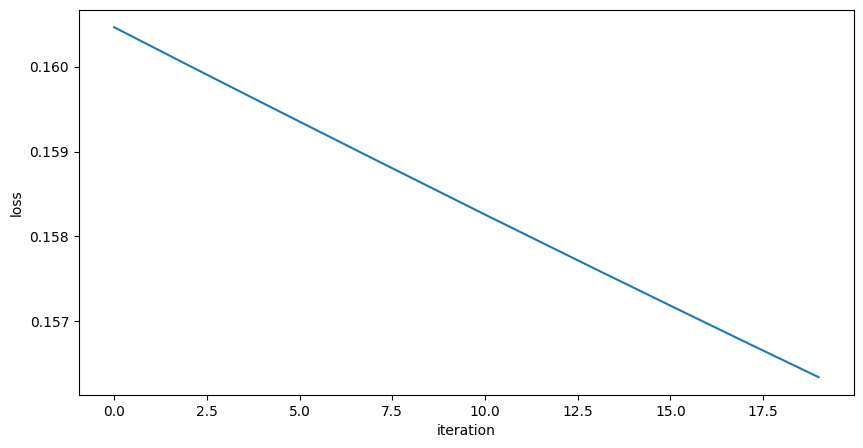

In [55]:
pl.plot(np.array(history64_bce.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

This loss fuction is also decreasing to steeply. Too few epochs!

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


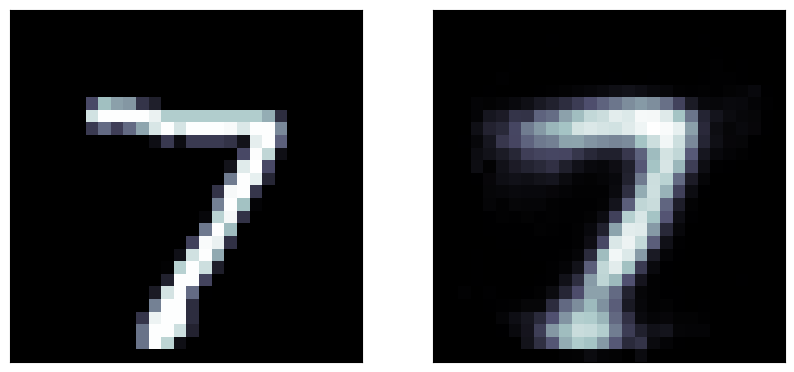

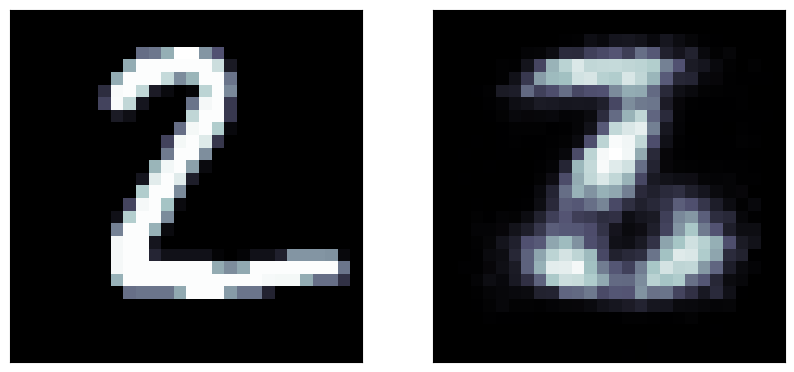

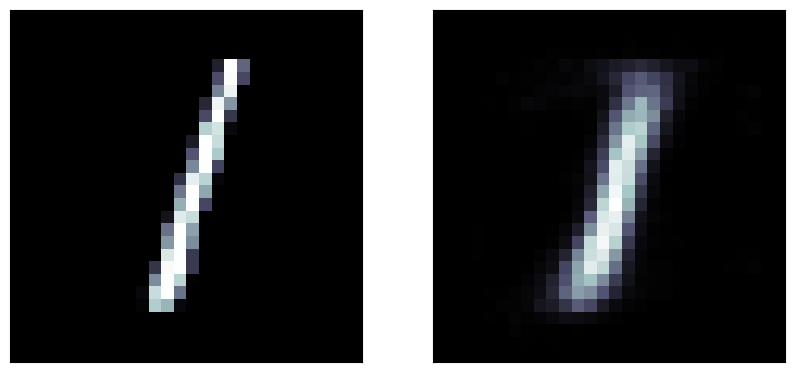

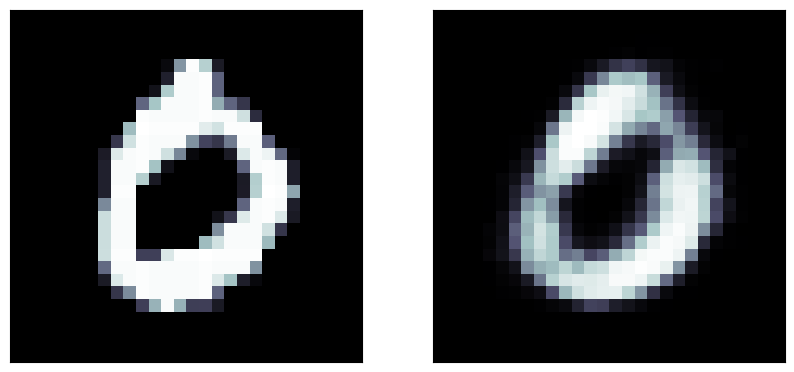

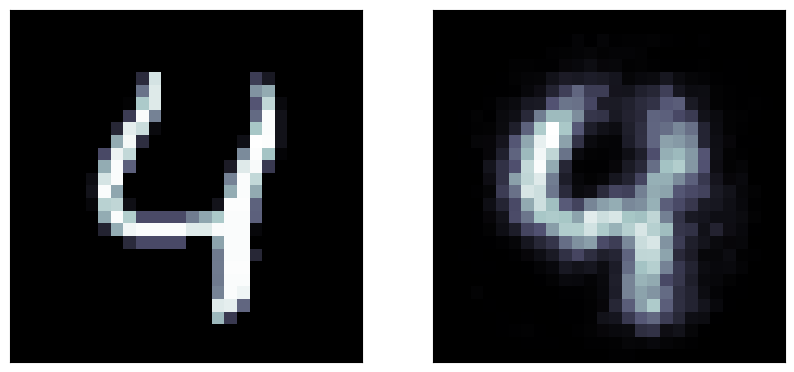

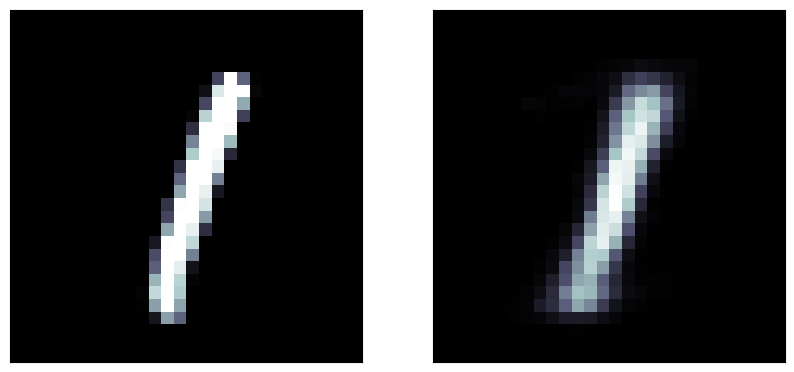

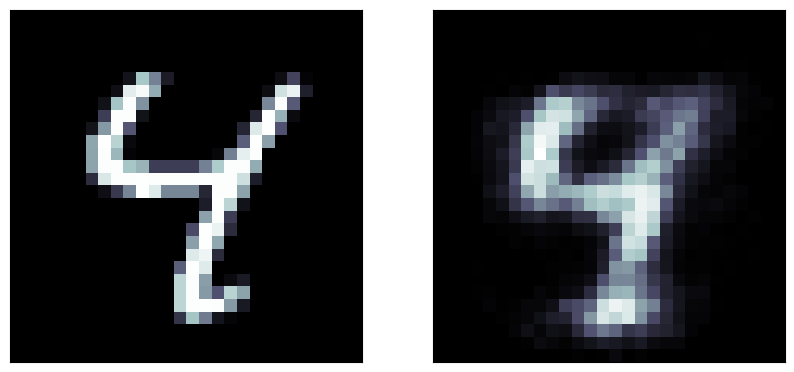

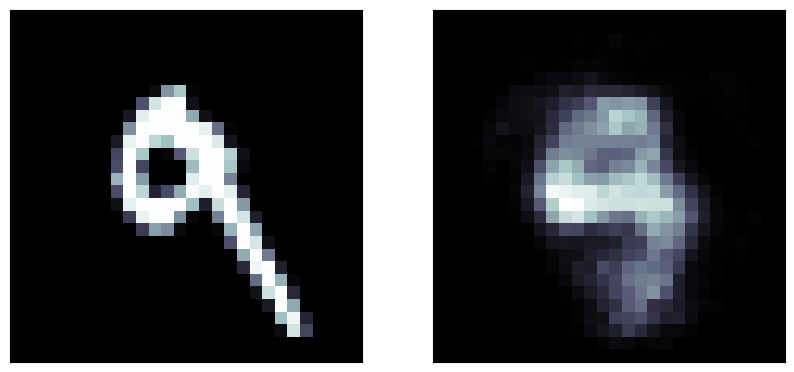

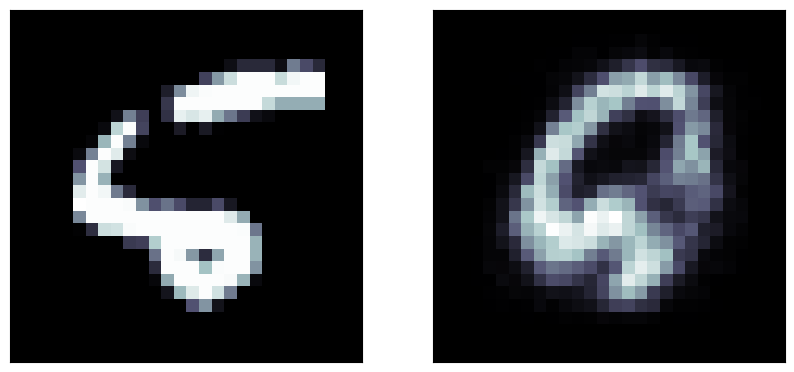

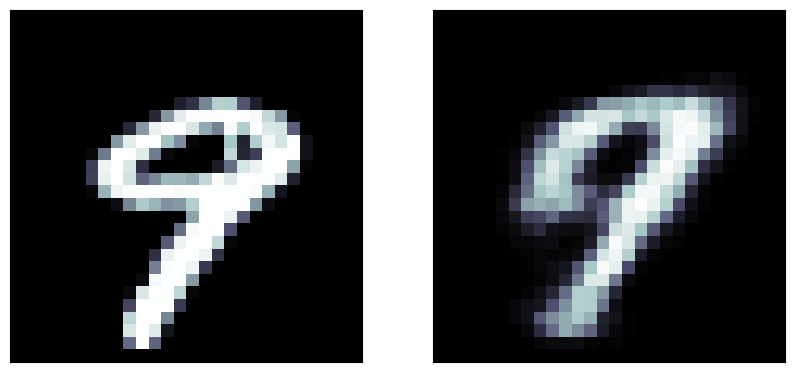

In [56]:
output_image64_bce = model_digits64_bce.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_bce, x_test)

This is a pretty good result!

Text(0.5, 1.0, 'the 3 loss functions, log scale')

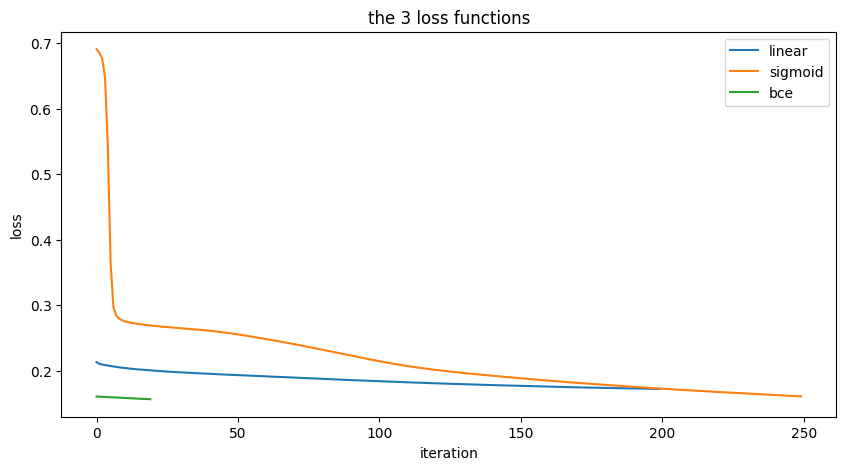

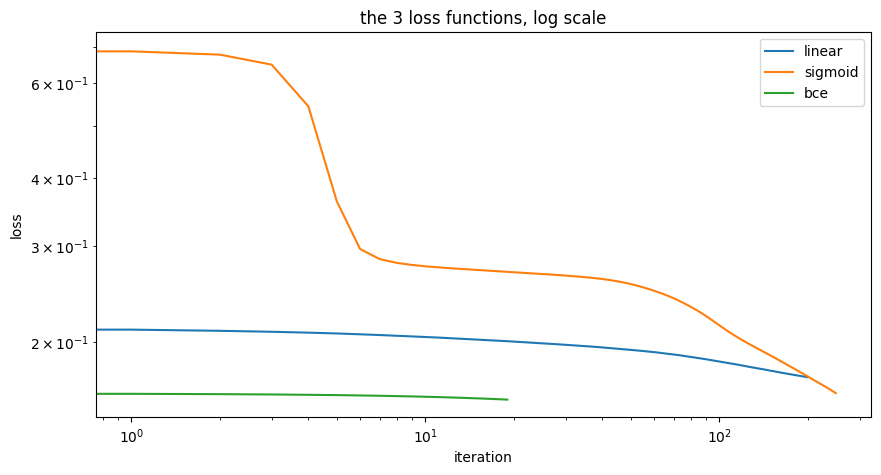

In [57]:
pl.plot(np.array(history64.history['loss']), label="linear")
pl.plot(np.array(history64_sig.history['loss']), label="sigmoid")
pl.plot(np.array(history64_bce.history['loss']), label="bce")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
pl.title("the 3 loss functions")
pl.figure()
pl.plot(np.array(history64.history['loss']), label="linear")
pl.plot(np.array(history64_sig.history['loss']), label="sigmoid")
pl.plot(np.array(history64_bce.history['loss']), label="bce")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.xscale('log')
pl.yscale('log')
pl.legend()
pl.title("the 3 loss functions, log scale")

All loss functions plotted: topin natural, bottomin logscale for enhanced visibility. It does not look like any of them is done learning (all decreasing rapidly still), especially the one for the the sigmoid-based mean square error loss.

# try more compression

Now we shrink the bottle neck to 16 neurons: a much more ambitions model!

In [58]:
model_digits = Sequential()
#encoder
model_digits.add(Dense(128, activation='relu', input_dim=ndim))
model_digits.add(Dense(64, activation='relu'))
model_digits.add(Dense(32, activation='relu'))
#bottle neck
model_digits.add(Dense(16, activation='relu'))
#decoder
model_digits.add(Dense(32, activation='relu'))
model_digits.add(Dense(64, activation='relu'))
model_digits.add(Dense(128, activation='relu'))
model_digits.add(Dense(ndim, activation='sigmoid'))


In [60]:
# model_digits.compile(optimizer="adadelta", loss="binary_crossentropy")
model_digits.compile(optimizer = keras.optimizers.Adadelta(learning_rate=0.01), loss="binary_crossentropy")

In [61]:
print(model_digits.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,456 (872.88 KB)

 Trainable params: 223,456 (872.88 KB)

 Non-trainable params: 0 (0.00 B)

None


In [62]:
history = model_digits.fit(x_train, x_train, epochs=200, batch_size=100, verbose=1)

Epoch 1/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6927
Epoch 2/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6913
Epoch 3/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6898
Epoch 4/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6881
Epoch 5/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6863
Epoch 6/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6840
Epoch 7/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6806
Epoch 8/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6730
Epoch 9/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6328
Epoch 10/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3946
Epoch 11/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2853
Epoch 12/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2766
Epoch 13/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2732
Epoch 14/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2713
Epoch 15/200
600/600 ━━━━━━━━━━━━━━━━━━━━ 2

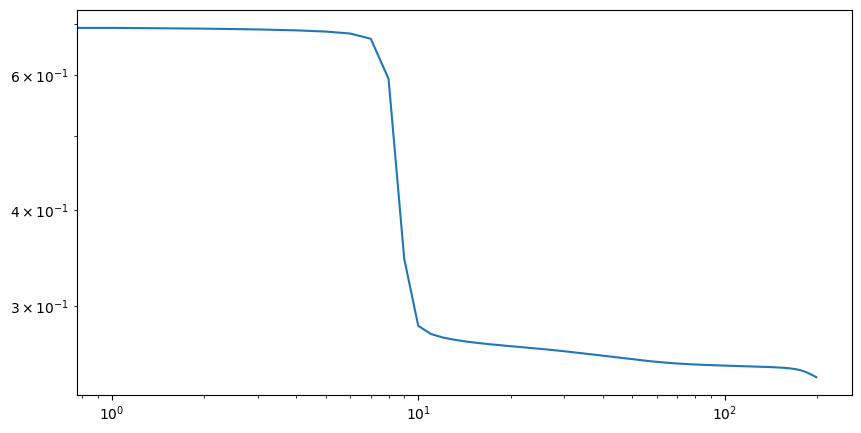

In [63]:
pl.plot(np.array(history.history['loss']))
pl.yscale('log')
pl.xscale('log')

the loss fuction: once again it did not finish learning.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


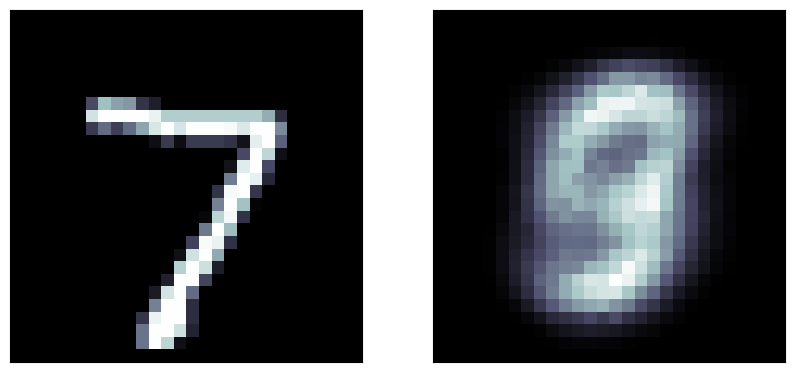

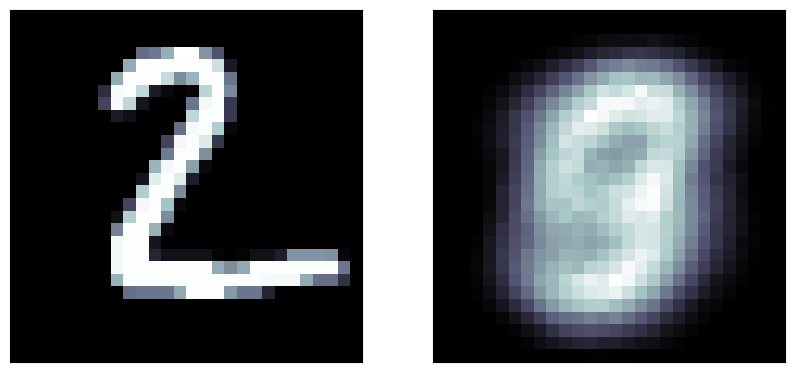

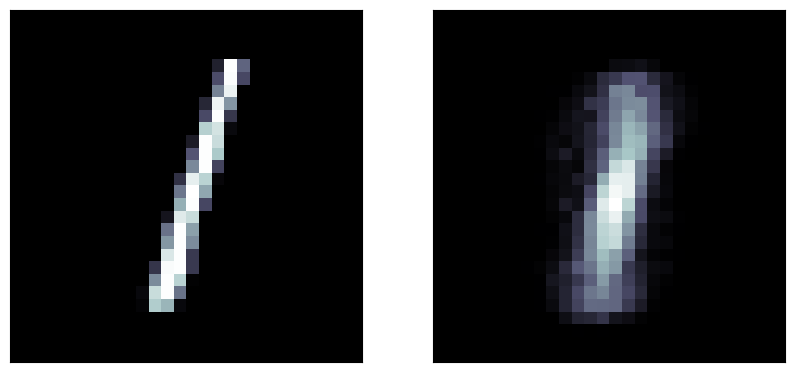

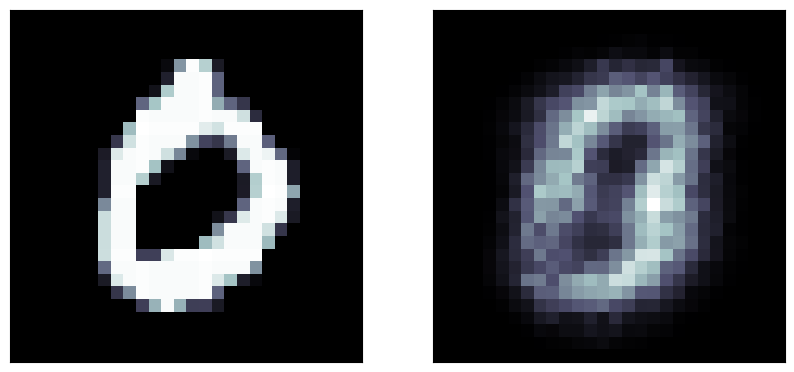

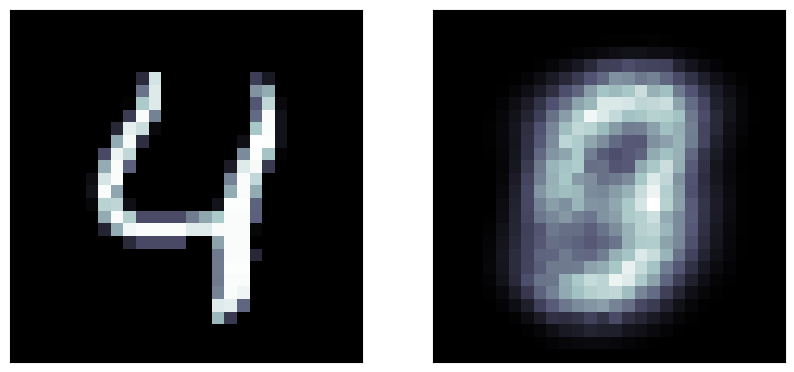

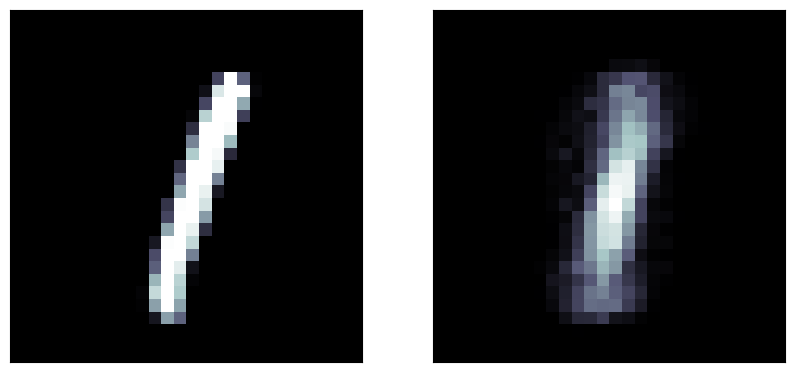

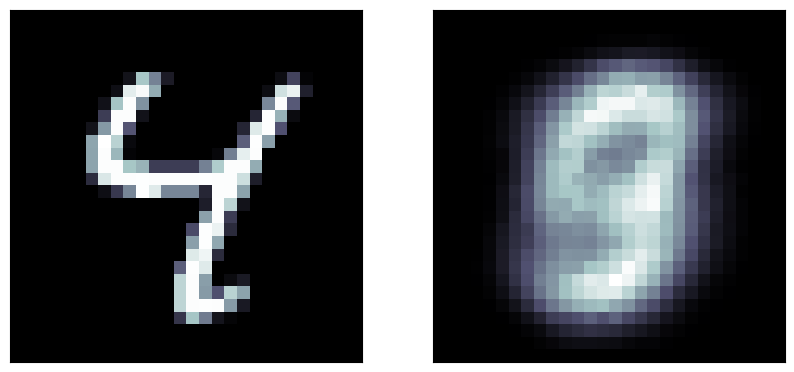

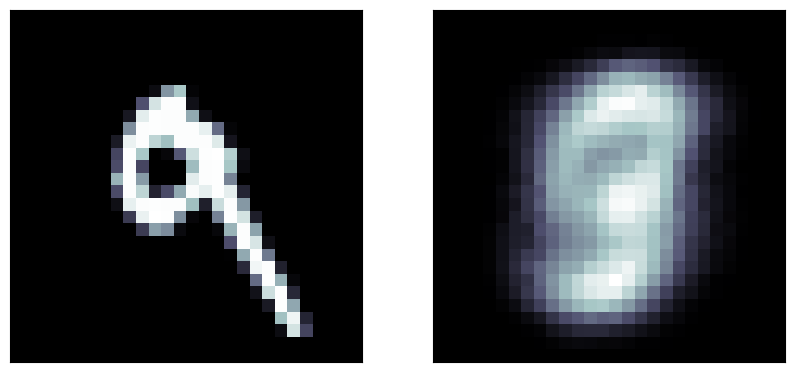

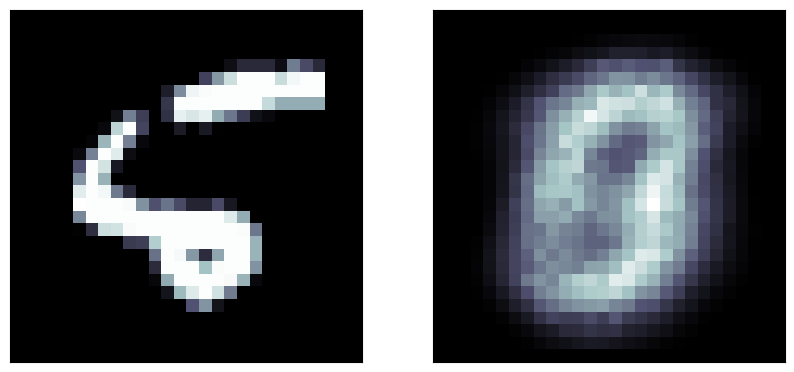

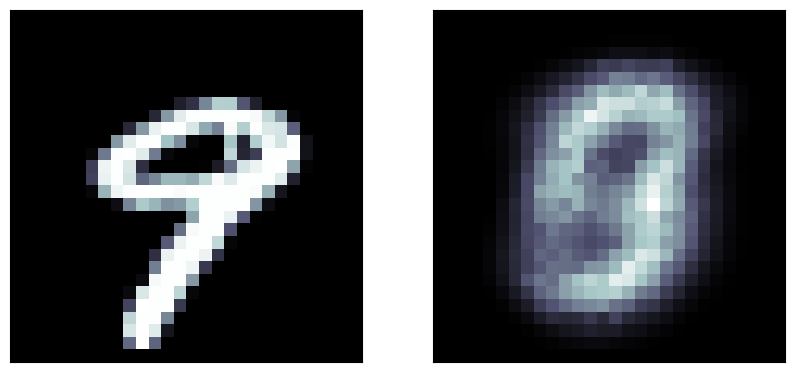

In [64]:
output_image = model_digits.predict(x_test)

for i in range(10):
  compareinout(i, output_image, x_test)

The result is not bad! The decoder can recreate the image from only 16 numbers!

# Extract feature

In [65]:
from keras import backend as K
# input placeholder
inp = model_digits.input
# extract the bottle neck outputs
outputs = model_digits.layers[3].output
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])

# Testing
layer_outs = functors(x_test[:1])
pl.imshow(layer_outs[0]);

ValueError: The layer sequential_4 has never been called and thus has no defined input.

This is the reducted representation of the first image in the test sample: a 16-values representation of the NxN pixel image

In [ ]:
def compareinout_encoded(i, outim, testimg, initialshape=(28,28)):
    fig = pl.figure(figsize(10,5))
    ax = fig.add_subplot(131)
    ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = fig.add_subplot(132)
    pl.imshow(functors(testimg[i:i+1])[0])
    pl.yticks([])
    ax = fig.add_subplot(133)
    ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [ ]:
for i in range(10):
  compareinout_encoded(i, output_image, x_test)

left: original imate

center: compressed representation

right: predicted image